In [1]:
train_data_dir = '/Users/shvadskd/src/MyProjects/DeepLearning/fast_ai/courses/deeplearning1/nbs/data/dogscats/train'
validation_data_dir = '/Users/shvadskd/src/MyProjects/DeepLearning/fast_ai/courses/deeplearning1/nbs/data/dogscats/valid'

In [2]:
# import the necessary packages
# from keras.applications import ResNet50
# from keras.applications import InceptionV3
# from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
#from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
#import cv2

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is disabled, cuDNN 5005)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [6]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [7]:
model = VGG16(weights='imagenet')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

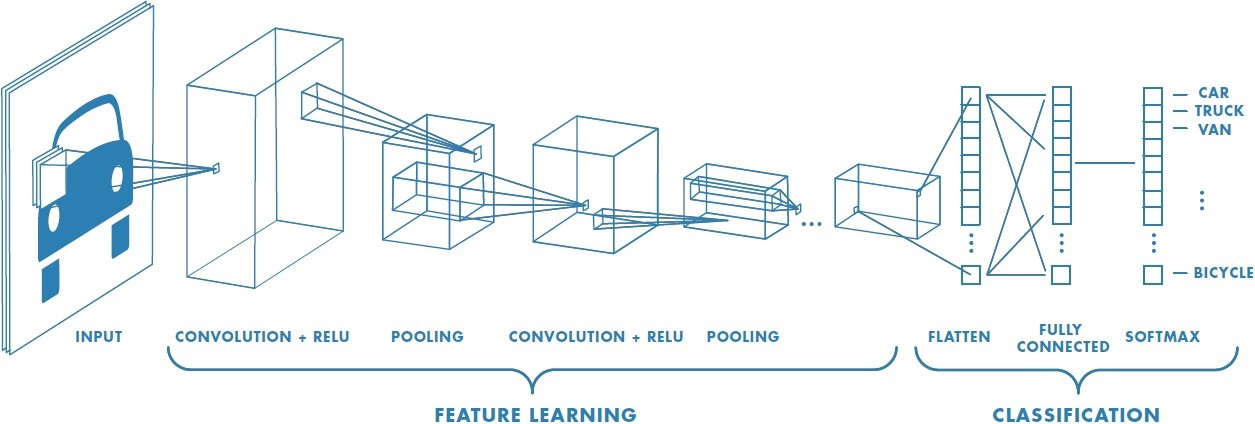

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "images/cnn_arch.jpeg")

In [6]:
def prep_image(img_path):
    # load the input image using the Keras helper utility while ensuring
    # the image is resized to `inputShape`, the required input dimensions
    # for the ImageNet pre-trained network
    image = load_img(img_path, target_size=inputShape)
    imgplot = plt.imshow(image)
    image = img_to_array(image)

    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through thenetwork
    image = np.expand_dims(image, axis=0)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image = preprocess(image)
    return image

In [7]:
def predict(image):    
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)

    # loop over the predictions and display the rank-5 predictions +
    # probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

In [25]:
def classify_image(base_path, cat_dog):
    # classify the image
    import os.path

    while(True):
        img_idx = random.randrange(0,9999)
        fname = base_path + "/{1}s/{1}.{0:04d}.jpg".format(img_idx, cat_dog)
        if os.path.isfile(fname): 
            image = prep_image(fname)
            predict(image)
            return

1. Siamese_cat: 20.99%
2. Egyptian_cat: 16.14%
3. carton: 5.85%
4. lynx: 4.43%
5. bath_towel: 4.35%


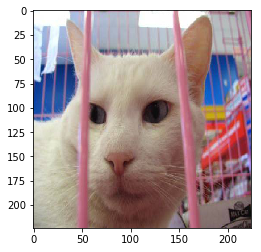

In [27]:
classify_image(train_data_dir,"cat")

1. soft-coated_wheaten_terrier: 6.90%
2. cocker_spaniel: 6.37%
3. briard: 3.76%
4. Norfolk_terrier: 3.35%
5. Leonberg: 2.62%


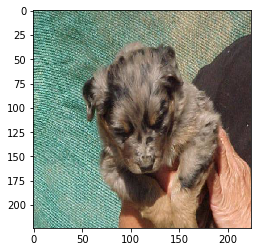

In [29]:
classify_image(train_data_dir,"dog")